In [1]:
import pandas as pd
enroll = pd.read_csv('./data/enrolleds_detail.csv')
enroll.tail(5)

,lecture_id,done_date,user_id
8282,5f266927e67b8fcf4340c093,2020-09-03 16:04:05.555000,9839ad64411238ad6664450ba3e6cc2b
8283,5f266927e67b8fcf4340c094,2020-09-03 16:04:10.446000,9839ad64411238ad6664450ba3e6cc2b
8284,5f266927e67b8fcf4340c095,2020-09-03 16:04:14.513000,9839ad64411238ad6664450ba3e6cc2b
8285,5f266927e67b8fcf4340c096,2020-09-03 16:05:21.233000,9839ad64411238ad6664450ba3e6cc2b
8286,5f275350c107da1758c81135,2020-09-03 15:40:49.006000,9839ad64411238ad6664450ba3e6cc2b


In [2]:
enroll_detail = enroll.groupby('lecture_id').count()['user_id']
enroll_detail

lecture_id
5f266927e67b8fcf4340c087    157
5f266927e67b8fcf4340c088    156
5f266927e67b8fcf4340c089    155
5f266927e67b8fcf4340c08a    154
5f266927e67b8fcf4340c08b    154
                           ... 
5f36558829f38171335a8906     77
5f36558829f38171335a8907     77
5f36558829f38171335a8908     77
5f36558829f38171335a8909     76
5f36558829f38171335a890a     75
Name: user_id, Length: 78, dtype: int64

Text(0.5, 1.0, '강의에 따른 수강완료 수의 합계')

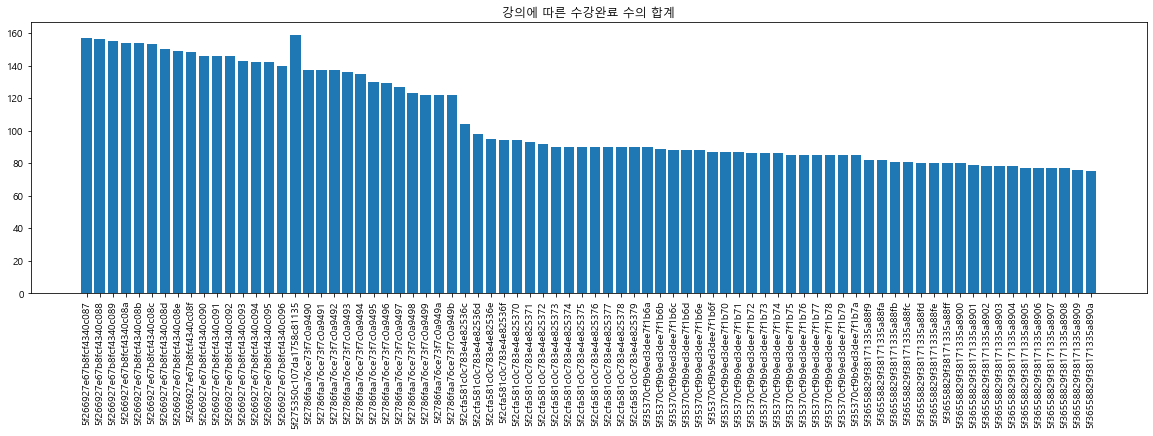

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize = (20,5))
plt.bar(enroll_detail.index,enroll_detail)
plt.xticks(rotation = 90)
plt.title('강의에 따른 수강완료 수의 합계')


In [4]:
lecture = pd.read_csv('./data/lectures.csv')
lecture.tail(5)

,title,playtime,week,week_order,lecture_id
73,포트포워딩,152,5,14,5f36558829f38171335a8906
74,nohup 설정하기,265,5,15,5f36558829f38171335a8907
75,도메인 구입하기,91,5,16,5f36558829f38171335a8908
76,og 태그,166,5,17,5f36558829f38171335a8909
77,웹개발 5주차 끝,57,5,18,5f36558829f38171335a890a


In [5]:
lecture_count = pd.DataFrame(enroll_detail)
lecture_count

,user_id
lecture_id,
5f266927e67b8fcf4340c087,157
5f266927e67b8fcf4340c088,156
5f266927e67b8fcf4340c089,155
5f266927e67b8fcf4340c08a,154
5f266927e67b8fcf4340c08b,154
...,...
5f36558829f38171335a8906,77
5f36558829f38171335a8907,77
5f36558829f38171335a8908,77


In [6]:
lecture_count = lecture_count.reset_index()
lecture_count

,lecture_id,user_id
0,5f266927e67b8fcf4340c087,157
1,5f266927e67b8fcf4340c088,156
2,5f266927e67b8fcf4340c089,155
3,5f266927e67b8fcf4340c08a,154
4,5f266927e67b8fcf4340c08b,154
...,...,...
73,5f36558829f38171335a8906,77
74,5f36558829f38171335a8907,77
75,5f36558829f38171335a8908,77
76,5f36558829f38171335a8909,76


In [7]:
lecture_count= lecture_count.rename(columns={'user_id':'count'})
lecture_count

,lecture_id,count
0,5f266927e67b8fcf4340c087,157
1,5f266927e67b8fcf4340c088,156
2,5f266927e67b8fcf4340c089,155
3,5f266927e67b8fcf4340c08a,154
4,5f266927e67b8fcf4340c08b,154
...,...,...
73,5f36558829f38171335a8906,77
74,5f36558829f38171335a8907,77
75,5f36558829f38171335a8908,77
76,5f36558829f38171335a8909,76


In [8]:
lecture = lecture.set_index('lecture_id')
full_lecture = lecture_count.join(lecture,on='lecture_id')
full_lecture

,lecture_id,count,title,playtime,week,week_order
0,5f266927e67b8fcf4340c087,157,웹개발 1주차 오늘 배울 것,532,1,1
1,5f266927e67b8fcf4340c088,156,"HTML, CSS 기본 내용",418,1,2
2,5f266927e67b8fcf4340c089,155,Quiz_간단한 로그인 페이지 만들어보기,251,1,3
3,5f266927e67b8fcf4340c08a,154,CSS 기초,295,1,4
4,5f266927e67b8fcf4340c08b,154,자주 쓰이는 CSS 연습하기,659,1,5
...,...,...,...,...,...,...
73,5f36558829f38171335a8906,77,포트포워딩,152,5,14
74,5f36558829f38171335a8907,77,nohup 설정하기,265,5,15
75,5f36558829f38171335a8908,77,도메인 구입하기,91,5,16
76,5f36558829f38171335a8909,76,og 태그,166,5,17


Text(0.5, 1.0, '강의에 따른 수강완료 수의 합계')

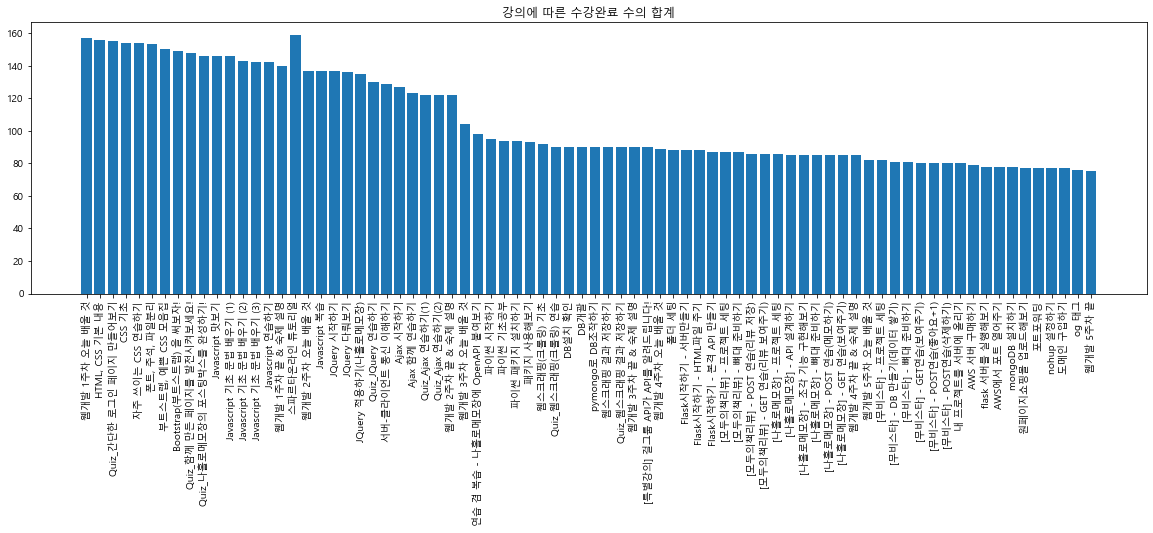

In [9]:
plt.figure(figsize = (20,5))
plt.bar(full_lecture['title'],full_lecture['count'])
plt.xticks(rotation = 90)
plt.title('강의에 따른 수강완료 수의 합계')


In [10]:
!pip install wordcloud

In [11]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
text01 = open('./data/Sequence_01.txt','r',encoding='utf-8-sig')
text01

<_io.TextIOWrapper name='./data/Sequence_01.txt' mode='r' encoding='utf-8-sig'>

In [15]:
text01.read()

'그럼 3주차 수업을 시작해 보겠습니다\n\n지난주 차에서는 우리가 Ajax라든지 아니면 jQuery라든지\n\n또 뭐 프로그래밍 언어를 처음으로 배워 가지고\n\n굉장히 또 어렵기도 하고\n\n또 기억해야 될 것도 되게 많은 주차였습니다\n\n근데 제가 오늘 장담 드리는데\n\n이 3주차는 진짜 재밌습니다 \n\n전통적으로 저희 스파르타 수업에서 3주차 수업은\n\n항상 너무너무 다들 재밌어 하셨어요\n\n그래서 오늘 기대하셔도 좋습니다\n\n오늘은요 우리가 나중에 이제 서버를 만들 언어인\n\n파이썬에 대해서 조금 기초적인 문법 같은 공부를 해 보고요\n\n그다음 파이썬으로 할 수 있는 것 중에 재밌는 게 뭐가 있냐면\n\n이렇게 야구 순위라든지 아니면 영화 순위\n\n뭐 이런 것들을 스크래핑 한다고 하거든요\n\n데이터들을 쫙 긁어와 가지고\n\n한번 내려 받는 것도 해 보고요\n\n또 데이터 긁어온 것들을\n\n데이터베이스에 넣는 것도 한번 해 볼 예정입니다\n\n그 전에 우리 2주차 연습 겸 복습 한 번만 하고\n\n지나갈게요 같이 한번 해 보시죠'

In [18]:
result = ""
for number in range(1,15):
    index = '{:02d}'.format(number)
    print(index)
    filename = 'Sequence_' + index + '.txt'
    print(filename)
    text = open('./data/' + filename,'r',encoding='utf-8-sig')
    result += text.read().replace("\n",' ')
print(result)

01
Sequence_01.txt
02
Sequence_02.txt
03
Sequence_03.txt
04
Sequence_04.txt
05
Sequence_05.txt
06
Sequence_06.txt
07
Sequence_07.txt
08
Sequence_08.txt
09
Sequence_09.txt
10
Sequence_10.txt
11
Sequence_11.txt
12
Sequence_12.txt
13
Sequence_13.txt
14
Sequence_14.txt
그럼 3주차 수업을 시작해 보겠습니다  지난주 차에서는 우리가 Ajax라든지 아니면 jQuery라든지  또 뭐 프로그래밍 언어를 처음으로 배워 가지고  굉장히 또 어렵기도 하고  또 기억해야 될 것도 되게 많은 주차였습니다  근데 제가 오늘 장담 드리는데  이 3주차는 진짜 재밌습니다   전통적으로 저희 스파르타 수업에서 3주차 수업은  항상 너무너무 다들 재밌어 하셨어요  그래서 오늘 기대하셔도 좋습니다  오늘은요 우리가 나중에 이제 서버를 만들 언어인  파이썬에 대해서 조금 기초적인 문법 같은 공부를 해 보고요  그다음 파이썬으로 할 수 있는 것 중에 재밌는 게 뭐가 있냐면  이렇게 야구 순위라든지 아니면 영화 순위  뭐 이런 것들을 스크래핑 한다고 하거든요  데이터들을 쫙 긁어와 가지고  한번 내려 받는 것도 해 보고요  또 데이터 긁어온 것들을  데이터베이스에 넣는 것도 한번 해 볼 예정입니다  그 전에 우리 2주차 연습 겸 복습 한 번만 하고  지나갈게요 같이 한번 해 보시죠그러면 나홀로 메모장에  스파르타가 만들어 놓은 OpenAPI를 먼저 붙여 보고  그다음에 계속 진행을 하겠습니다  어떤 api인지 먼저 보고 갈게요  [코드스니펫] 1번을 여셔 가지고   복사해서 붙여 넣으면 요렇게 데이터들이 쭉 나옵니다  그 다음에 2번을 또 열어 가지고  한번 구경을 보시면 데이터가 뭔지 알 수 있어요   뭐냐면 카드 데이터입니다 그린북이 있잖아요  첫 번째 그린북이 나와요  그죠 그 다음 

In [22]:
import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\Windows\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothL.ttc
Franklin Gothic Medium C:\Windows\Fonts\framdit.ttf
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
Century Gothic C:\WINDOWS\Fonts\GOTHICB.TTF
HYGothic-Extra C:\Windows\Fonts\H2GTRE.TTF
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICI.TTF
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
AlternateGothic2 BT C:\WINDOWS\Fonts\Alternate Gothic No2 BT.ttf
MS Gothic C:\Windows\Fonts\msgothic.ttc
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\Windows\Fonts\framd.ttf
Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Yu Gothic C:\Windows\Fonts\YuGothB.ttc
Yu Gothic C:\Windows\Fonts\YuGothR.ttc
AlternateGothic2 BT C:\Windows\Fonts\Alternate Gothic No2 BT.ttf
Century Gothic C:\Windows\Fonts\GOTH

In [23]:
font_path = ' C:\Windows\Fonts\malgun.ttf'

wc = WordCloud(font_path=font_path,background_color = "white")
wc.generate(result)

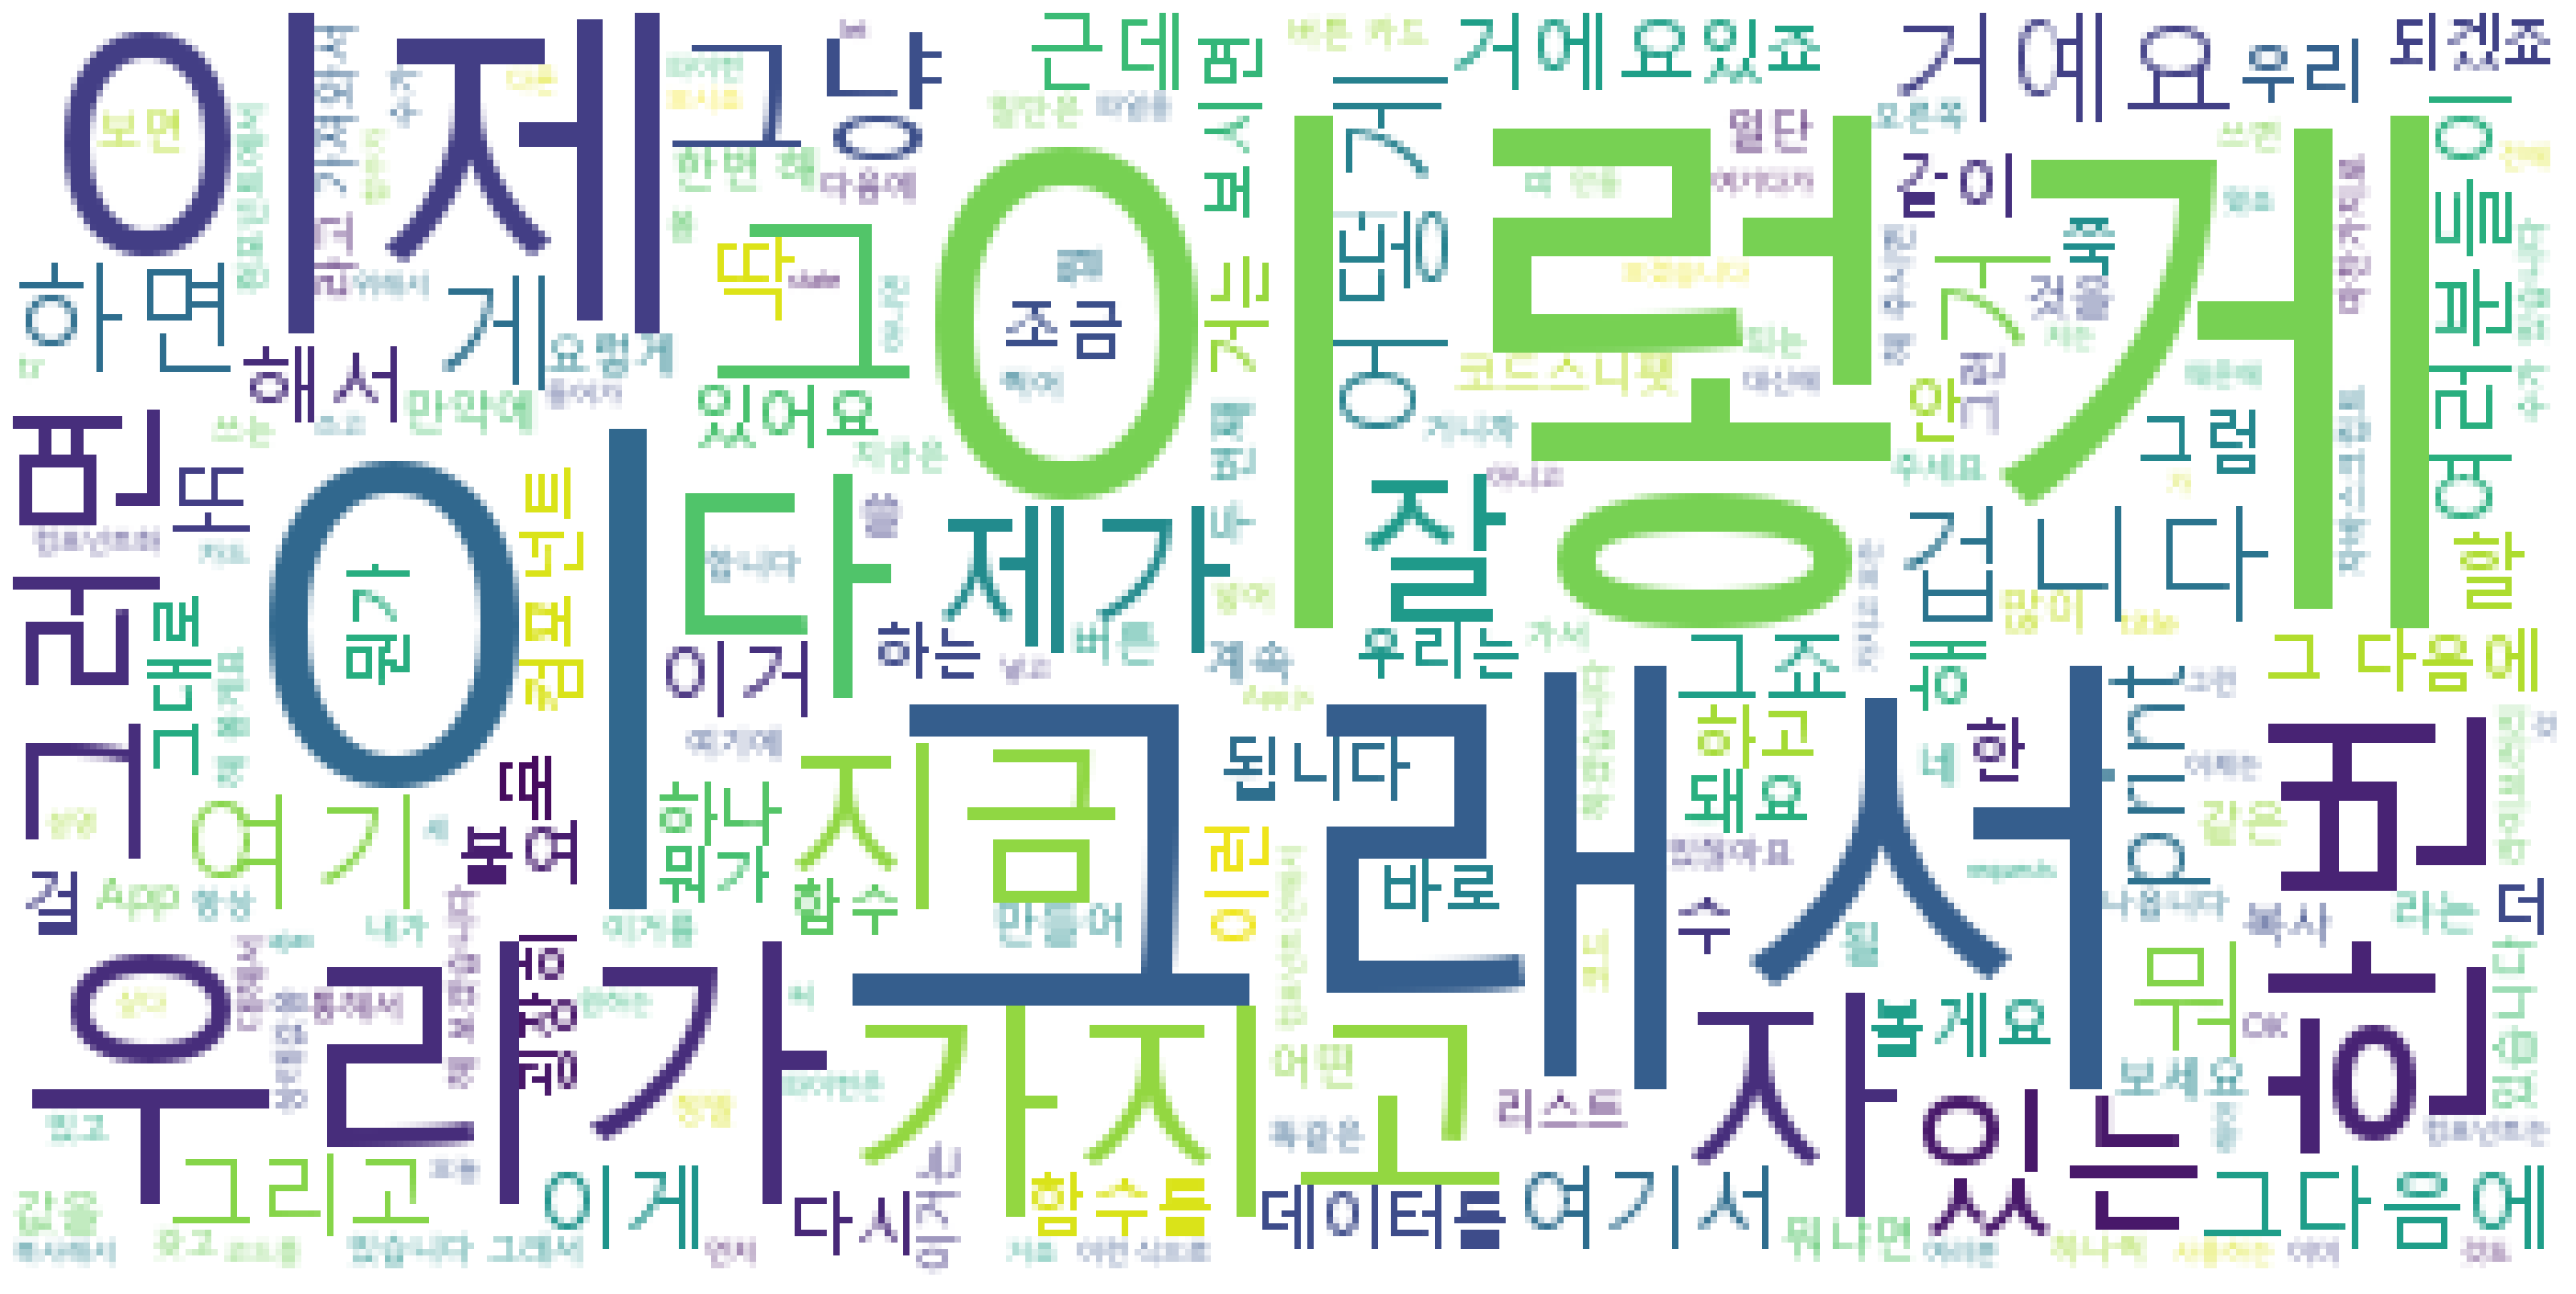

In [24]:
plt.figure(figsize = (50,50))
plt.axis("off")
plt.imshow(wc)

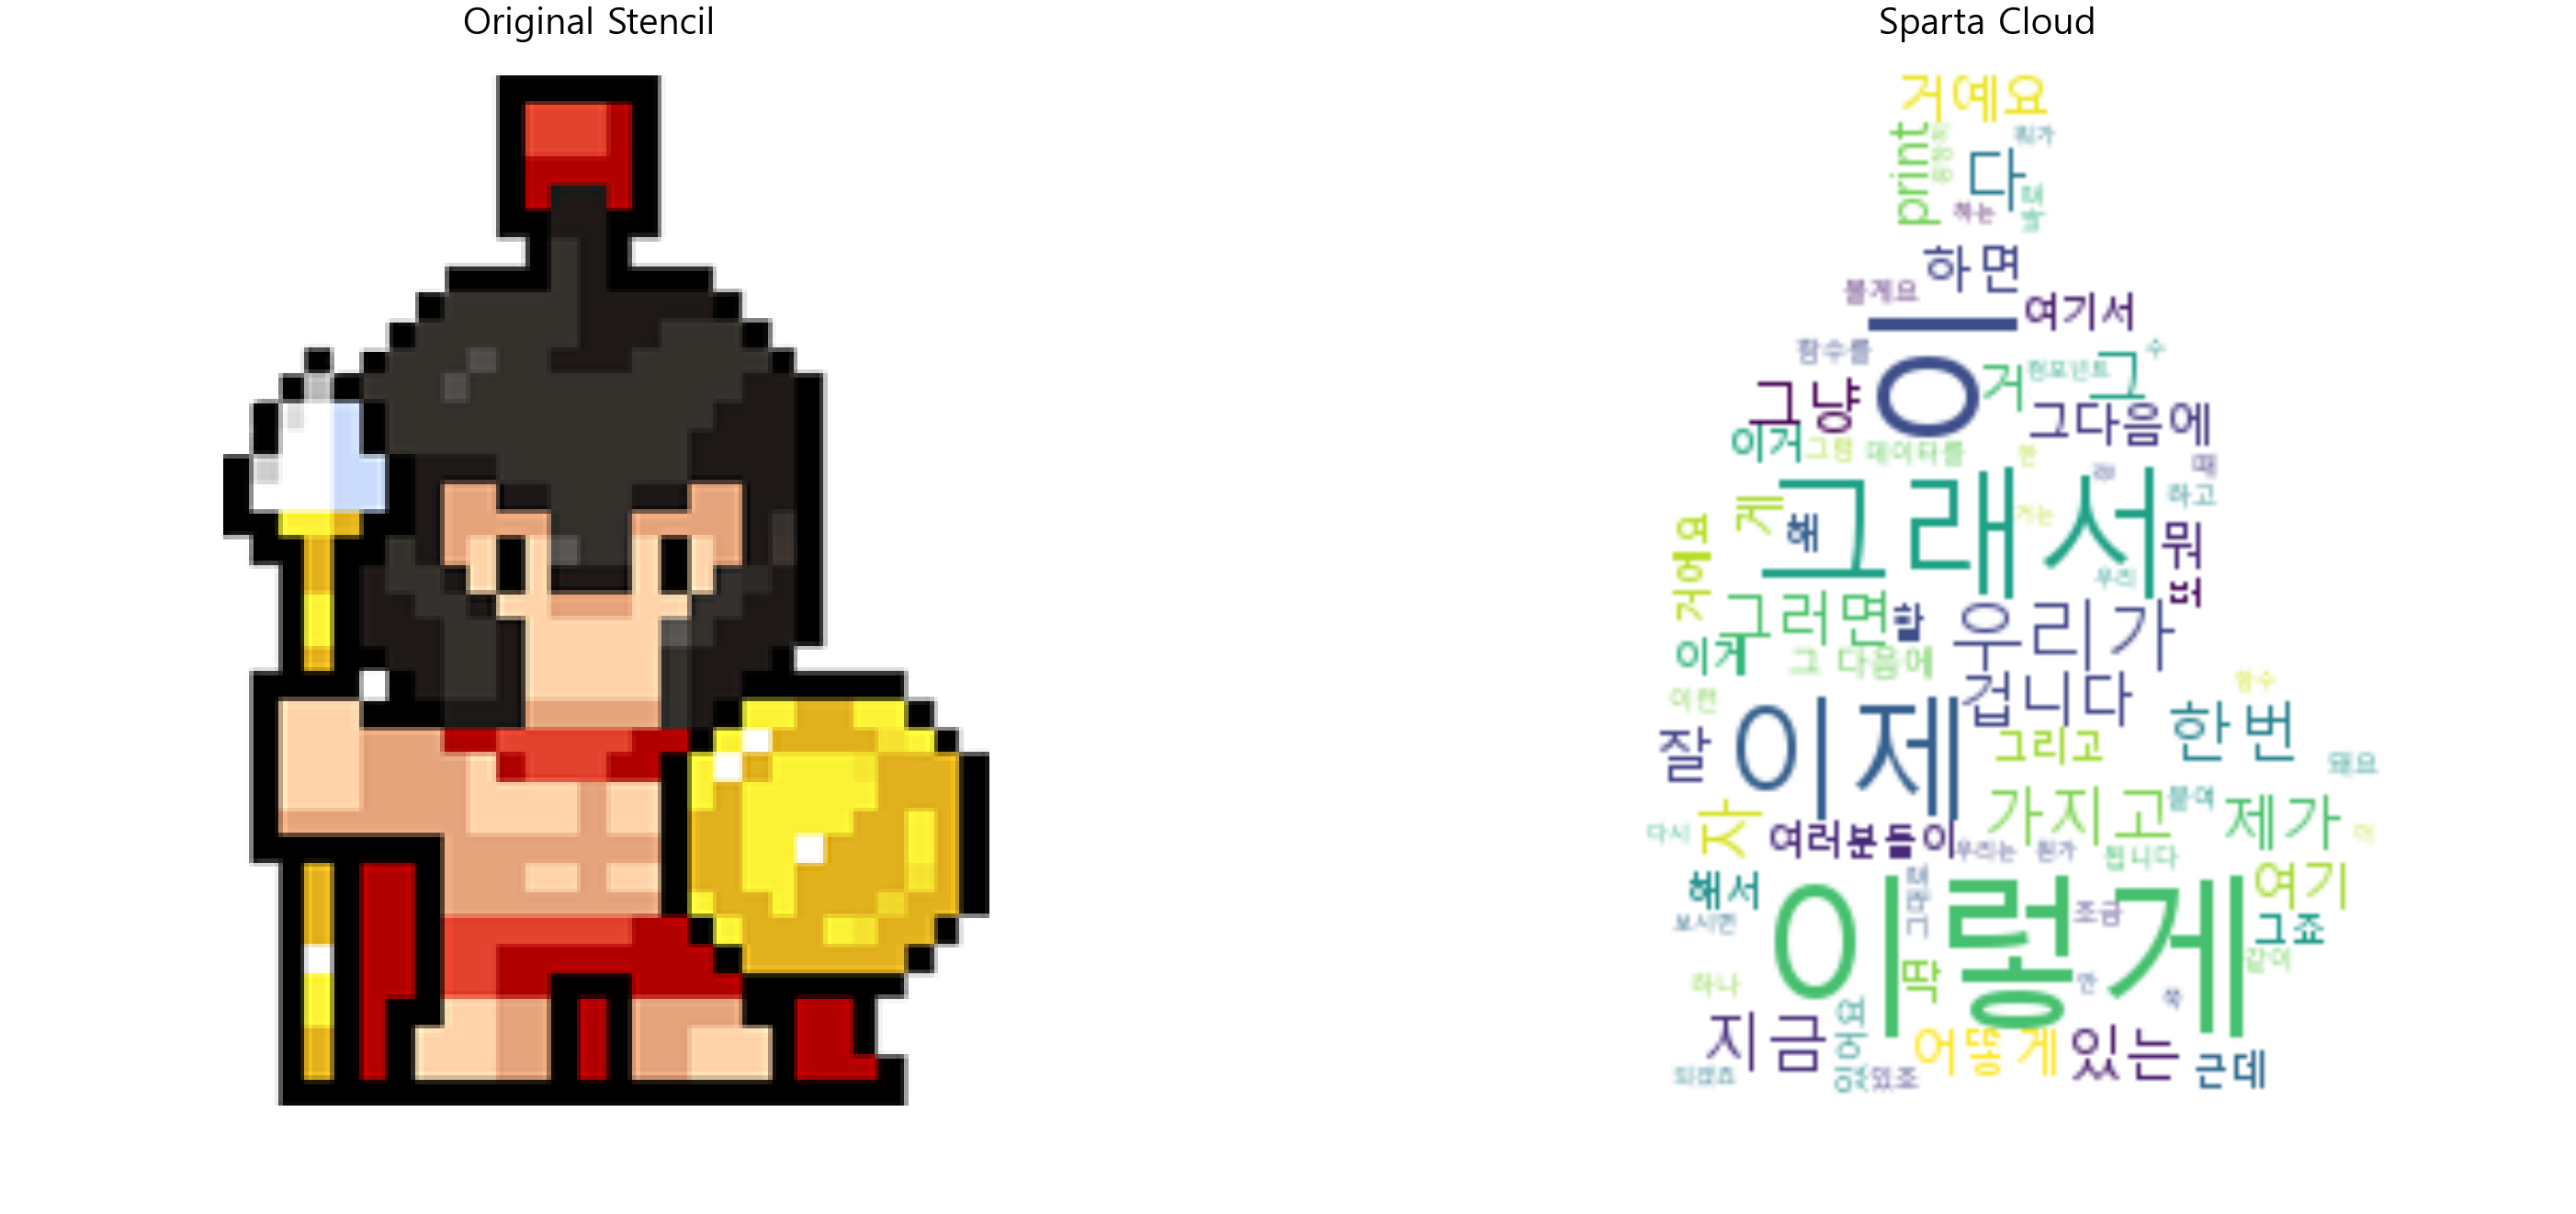

In [25]:
# Generate a word cloud image
mask = np.array(Image.open('./data/sparta.png'))
wc = WordCloud(font_path=font_path, background_color="white", mask=mask)
wc.generate(result)

f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray)
plt.title('Original Stencil', size=40)
plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('Sparta Cloud', size=40)
plt.axis("off")
plt.show()

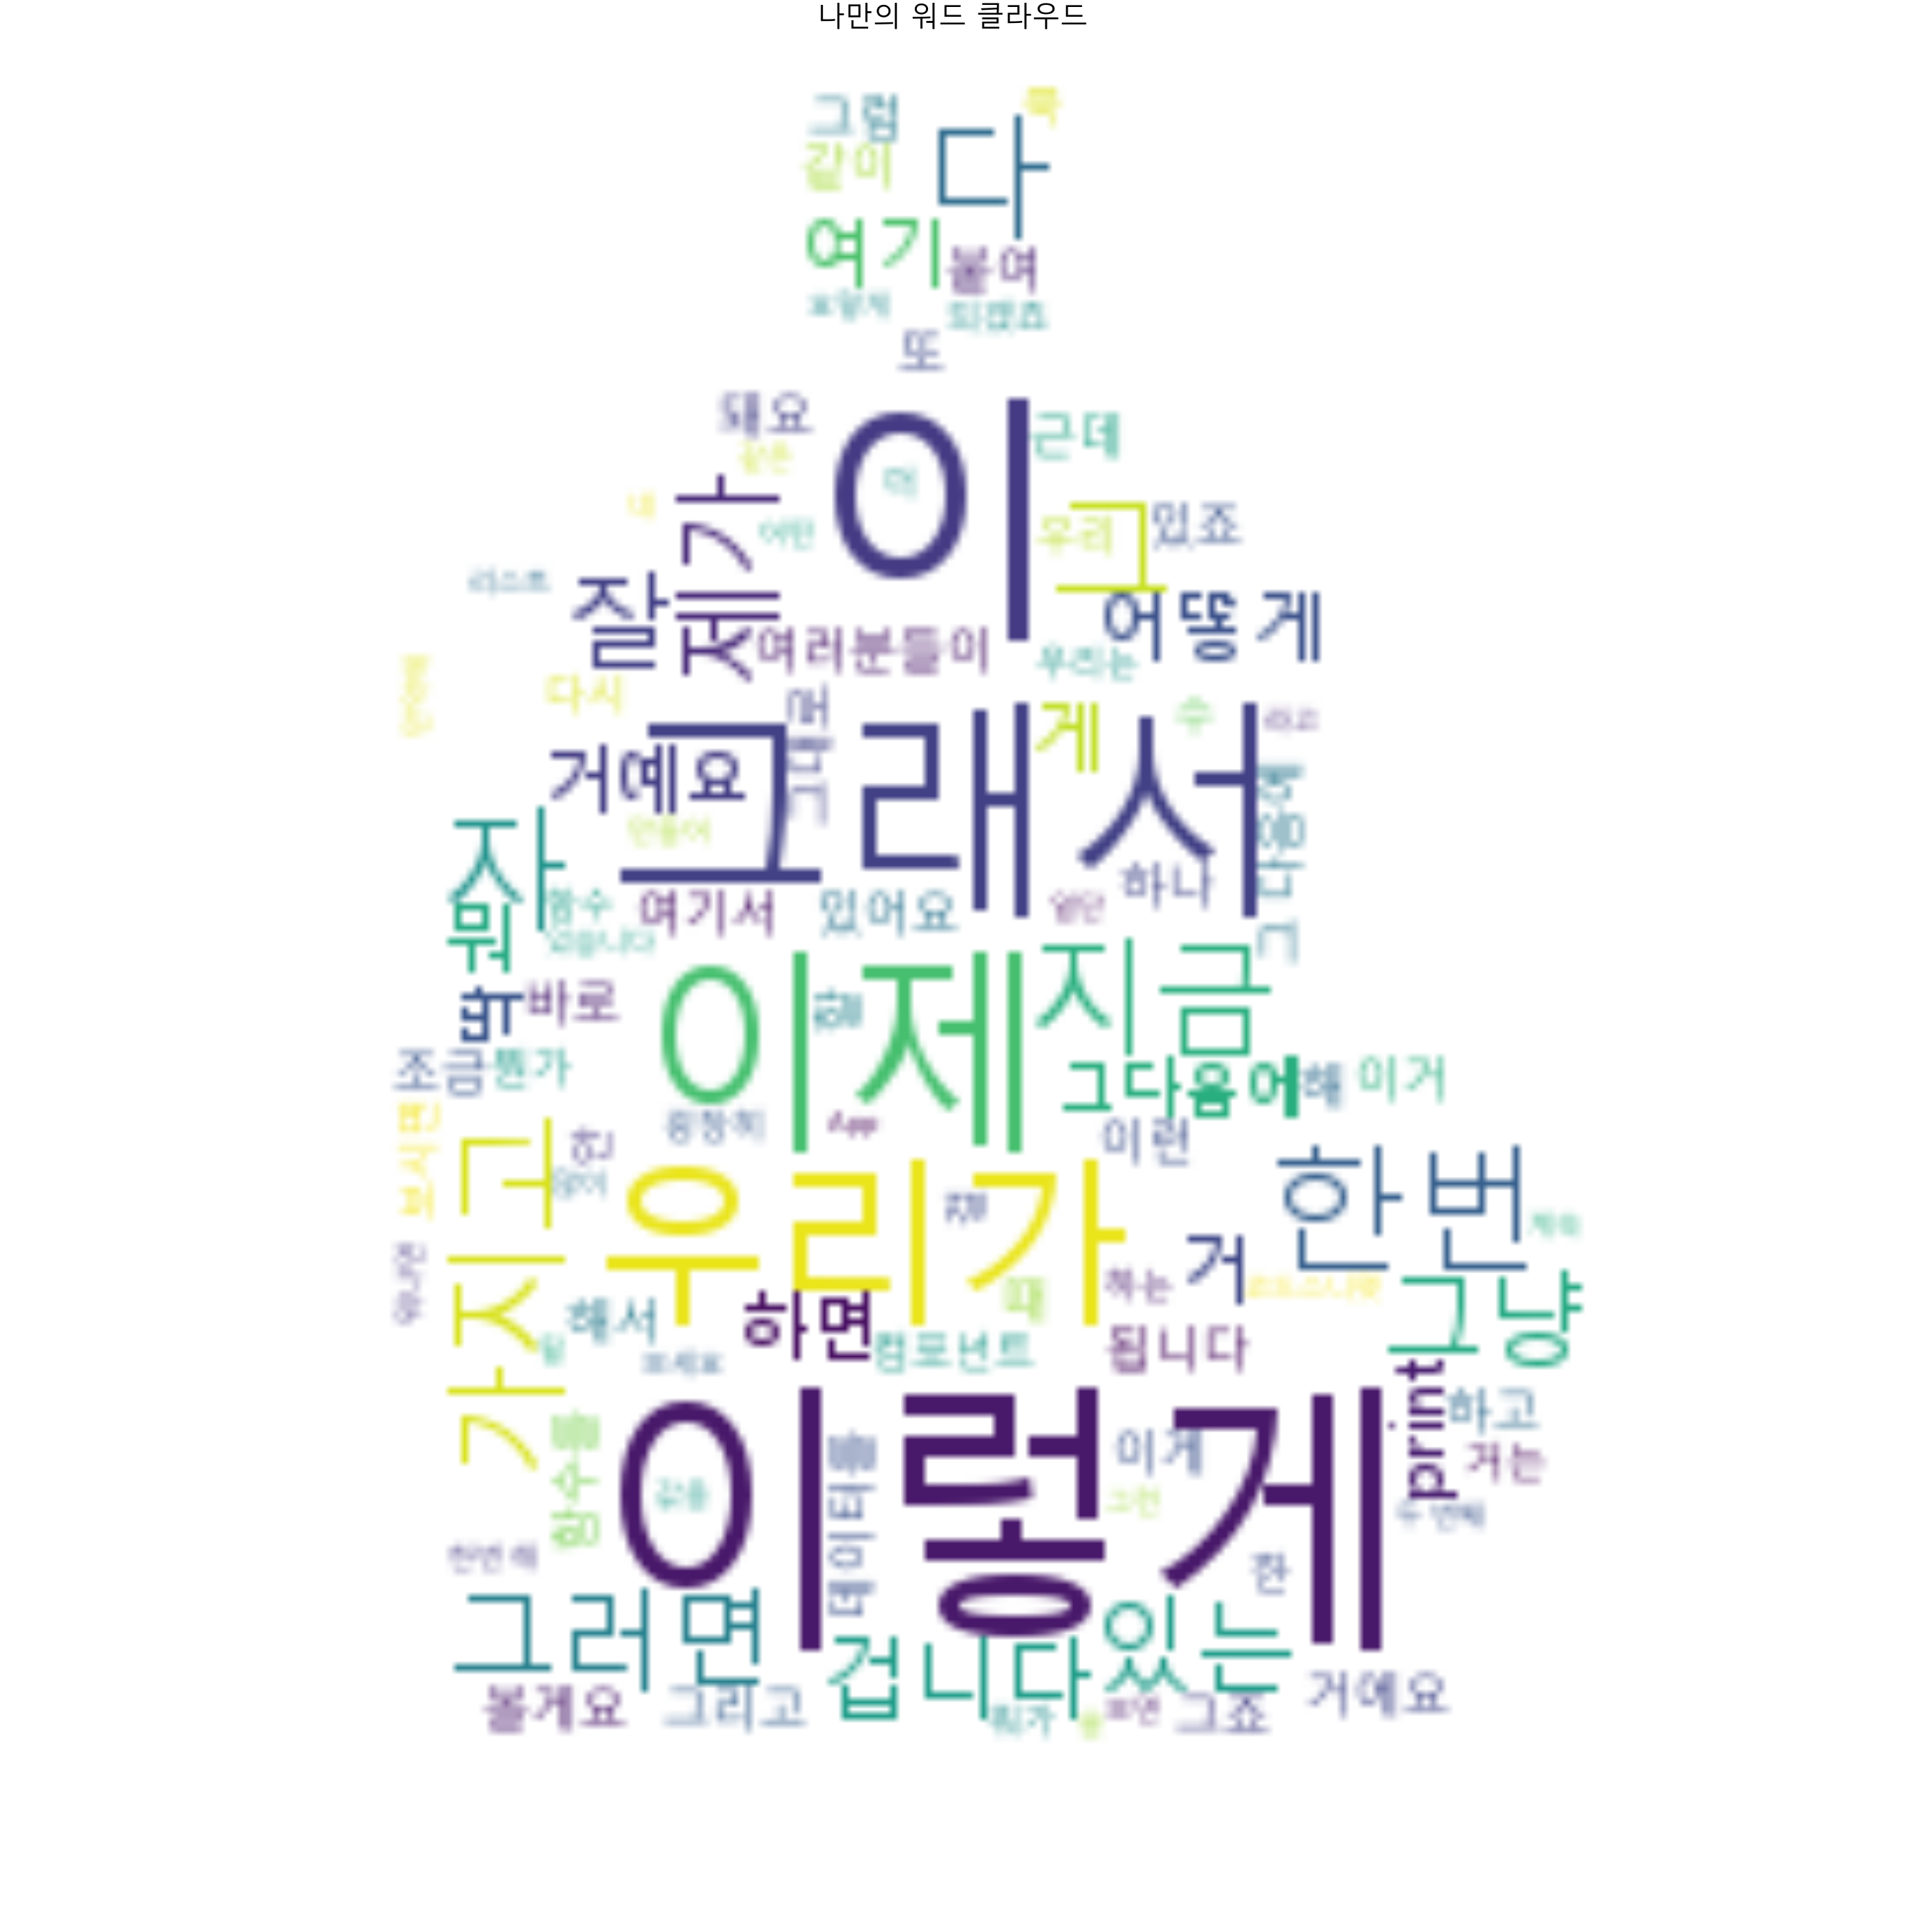

In [28]:
mask = np.array(Image.open('./data/sparta.png'))
wc = WordCloud(font_path = font_path,background_color='white', mask = mask)
wc.generate(result)

f = plt.figure(figsize = (50,50))
plt.imshow(wc,interpolation='bilinear')
plt.title('나만의 워드 클라우드',size = 40)
plt.axis('off')
f.savefig('./data/wordcloud.png')


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

In [30]:
sparta_data = pd.read_csv('./data/enrolleds_detail.csv')
sparta_data.tail(5)

,lecture_id,done_date,user_id
8282,5f266927e67b8fcf4340c093,2020-09-03 16:04:05.555000,9839ad64411238ad6664450ba3e6cc2b
8283,5f266927e67b8fcf4340c094,2020-09-03 16:04:10.446000,9839ad64411238ad6664450ba3e6cc2b
8284,5f266927e67b8fcf4340c095,2020-09-03 16:04:14.513000,9839ad64411238ad6664450ba3e6cc2b
8285,5f266927e67b8fcf4340c096,2020-09-03 16:05:21.233000,9839ad64411238ad6664450ba3e6cc2b
8286,5f275350c107da1758c81135,2020-09-03 15:40:49.006000,9839ad64411238ad6664450ba3e6cc2b


In [32]:
format = '%Y-%m-%dT%H:%M:%S.%f'
sparta_data['done_date_time'] = pd.to_datetime(sparta_data['done_date'],format = format)
sparta_data

,lecture_id,done_date,user_id,done_date_time
0,5f266927e67b8fcf4340c087,2020-08-18 23:15:34.423000,4b7059a5ac55da515ec9bd77c7ceaaff,2020-08-18 23:15:34.423
1,5f266927e67b8fcf4340c088,2020-09-02 14:44:24.450000,4b7059a5ac55da515ec9bd77c7ceaaff,2020-09-02 14:44:24.450
2,5f266927e67b8fcf4340c087,2020-08-04 11:56:07.321000,3614f59da8a89ab0e92e9e5b44b3de9e,2020-08-04 11:56:07.321
3,5f266927e67b8fcf4340c088,2020-08-04 12:07:08.064000,3614f59da8a89ab0e92e9e5b44b3de9e,2020-08-04 12:07:08.064
4,5f266927e67b8fcf4340c089,2020-08-04 12:14:39.117000,3614f59da8a89ab0e92e9e5b44b3de9e,2020-08-04 12:14:39.117
...,...,...,...,...
8282,5f266927e67b8fcf4340c093,2020-09-03 16:04:05.555000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:05.555
8283,5f266927e67b8fcf4340c094,2020-09-03 16:04:10.446000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:10.446
8284,5f266927e67b8fcf4340c095,2020-09-03 16:04:14.513000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:14.513
8285,5f266927e67b8fcf4340c096,2020-09-03 16:05:21.233000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:05:21.233


In [34]:
sparta_data['done_date_time_weekday'] = sparta_data['done_date_time'].dt.day_name()
sparta_data

,lecture_id,done_date,user_id,done_date_time,done_date_time_weekday
0,5f266927e67b8fcf4340c087,2020-08-18 23:15:34.423000,4b7059a5ac55da515ec9bd77c7ceaaff,2020-08-18 23:15:34.423,Tuesday
1,5f266927e67b8fcf4340c088,2020-09-02 14:44:24.450000,4b7059a5ac55da515ec9bd77c7ceaaff,2020-09-02 14:44:24.450,Wednesday
2,5f266927e67b8fcf4340c087,2020-08-04 11:56:07.321000,3614f59da8a89ab0e92e9e5b44b3de9e,2020-08-04 11:56:07.321,Tuesday
3,5f266927e67b8fcf4340c088,2020-08-04 12:07:08.064000,3614f59da8a89ab0e92e9e5b44b3de9e,2020-08-04 12:07:08.064,Tuesday
4,5f266927e67b8fcf4340c089,2020-08-04 12:14:39.117000,3614f59da8a89ab0e92e9e5b44b3de9e,2020-08-04 12:14:39.117,Tuesday
...,...,...,...,...,...
8282,5f266927e67b8fcf4340c093,2020-09-03 16:04:05.555000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:05.555,Thursday
8283,5f266927e67b8fcf4340c094,2020-09-03 16:04:10.446000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:10.446,Thursday
8284,5f266927e67b8fcf4340c095,2020-09-03 16:04:14.513000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:14.513,Thursday
8285,5f266927e67b8fcf4340c096,2020-09-03 16:05:21.233000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:05:21.233,Thursday


In [44]:
weekdata = sparta_data.groupby('done_date_time_weekday').count()['user_id']
weekdata = weekdata.agg(weeks)
weekdata

Monday       1420
Tuesday      1673
Wednesday     904
Thursday      948
Friday        864
Saturday      929
Sunday       1549
Name: user_id, dtype: int64

Text(0.5, 1.0, '요일별 수강 완료 수강생 수')

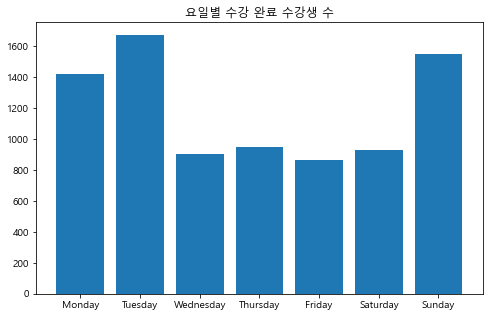

In [45]:
plt.figure(figsize = (8,5))
plt.bar(weekdata.index,weekdata)
plt.title('요일별 수강 완료 수강생 수')

In [43]:
weeks = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weeks

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [47]:
sparta_data['done_date_time_hour'] = sparta_data['done_date_time'].dt.hour
sparta_data

,lecture_id,done_date,user_id,done_date_time,done_date_time_weekday,date_done_time_hour,done_date_time_hour
0,5f266927e67b8fcf4340c087,2020-08-18 23:15:34.423000,4b7059a5ac55da515ec9bd77c7ceaaff,2020-08-18 23:15:34.423,Tuesday,23,23
1,5f266927e67b8fcf4340c088,2020-09-02 14:44:24.450000,4b7059a5ac55da515ec9bd77c7ceaaff,2020-09-02 14:44:24.450,Wednesday,14,14
2,5f266927e67b8fcf4340c087,2020-08-04 11:56:07.321000,3614f59da8a89ab0e92e9e5b44b3de9e,2020-08-04 11:56:07.321,Tuesday,11,11
3,5f266927e67b8fcf4340c088,2020-08-04 12:07:08.064000,3614f59da8a89ab0e92e9e5b44b3de9e,2020-08-04 12:07:08.064,Tuesday,12,12
4,5f266927e67b8fcf4340c089,2020-08-04 12:14:39.117000,3614f59da8a89ab0e92e9e5b44b3de9e,2020-08-04 12:14:39.117,Tuesday,12,12
...,...,...,...,...,...,...,...
8282,5f266927e67b8fcf4340c093,2020-09-03 16:04:05.555000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:05.555,Thursday,16,16
8283,5f266927e67b8fcf4340c094,2020-09-03 16:04:10.446000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:10.446,Thursday,16,16
8284,5f266927e67b8fcf4340c095,2020-09-03 16:04:14.513000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:14.513,Thursday,16,16
8285,5f266927e67b8fcf4340c096,2020-09-03 16:05:21.233000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:05:21.233,Thursday,16,16


In [50]:
hour_data = sparta_data.groupby('done_date_time_hour').count()['user_id']
hour_data


done_date_time_hour
0      359
1      197
2      147
3      123
4       65
5       50
6       62
7       85
8      127
9      218
10     303
11     282
12     265
13     367
14     392
15     485
16     531
17     479
18    1152
19     453
20     530
21     592
22     591
23     432
Name: user_id, dtype: int64

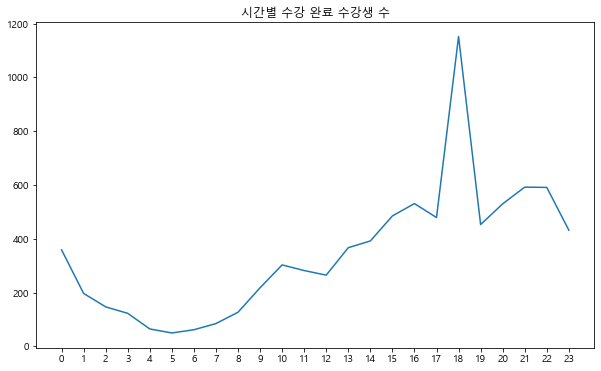

In [55]:
plt.figure(figsize = (10,6))
plt.plot(hour_data.index,hour_data)
plt.title('시간별 수강 완료 수강생 수')
plt.xticks(np.arange(24))
plt.show()

In [57]:
sparta_data_pivot_table = pd.pivot_table(sparta_data,values = 'user_id', aggfunc = 'count',
               index = ['done_date_time_weekday']
               ,columns = ['done_date_time_hour']).agg(weeks)
sparta_data_pivot_table

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Monday,79,31,30,27,3,5,19,14,28,24,...,64,57,105,87,73,90,127,121,127,90
Tuesday,54,27,20,12,6,3,6,14,20,26,...,41,58,70,35,740,59,67,99,92,87
Wednesday,47,19,12,8,10,15,14,4,23,20,...,36,68,41,69,81,72,58,78,83,52
Thursday,39,30,10,15,14,2,5,11,10,18,...,47,71,81,62,63,61,70,63,94,66
Friday,72,36,20,9,5,1,5,2,10,34,...,44,61,57,70,67,51,46,45,48,33
Saturday,31,17,10,22,7,4,4,19,9,51,...,72,78,66,82,55,26,48,70,52,37
Sunday,37,37,45,30,20,20,9,21,27,45,...,88,92,111,74,73,94,114,116,95,67


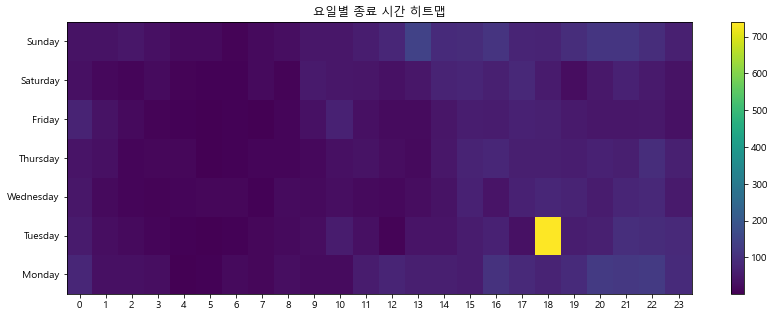

In [61]:
plt.figure(figsize = (14,5))
plt.pcolor(sparta_data_pivot_table)
plt.yticks(np.arange(0.5,len(sparta_data_pivot_table.index),1),sparta_data_pivot_table.index)
plt.xticks(np.arange(0.5,len(sparta_data_pivot_table.columns),1),sparta_data_pivot_table.columns)
plt.title('요일별 종료 시간 히트맵')
plt.colorbar()